In [1]:
import numpy as np
import tqdm.notebook as tqdm
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [1]:
def sigmoid(x):
    """Compute sigmoid."""
    return 1 / (1 + np.exp(-x))


def model(x, beta):
    """This is our Logistic Regression model.
    
    x: (n_samples, n_features)
    beta: (n_features, )
    
    """
    return sigmoid(x @ beta.T)

In [2]:
def reg_log(x, epsilon: float = 1e-5):
    """Compute a regularised log."""
    return np.log(x + epsilon)


def log_loss(*, y_true, y_pred):
    """Compute the log loss.

    y_true: (n_samples, )
    y_pred: (n_samples, )

    """
    y = y_true
    s = y_pred
    m = len(y)
    assert s.shape == y.shape
    return (np.dot(y, reg_log(1 / s)) + np.dot((1 - y), reg_log(1 / (1 - s)))) / m

In [4]:
def loss_gradient(y_true, x, beta):
    """Compute the value of the dloss/dbeta."""
    m = len(y_true)
    s = model(x, beta)
    
    return (1 / m) * (x.T @ (s - y))


def gradient_descent_step(y_true, x, beta, learning_rate=0.01):
    """Apply a gradient descent step."""
    new_beta = beta - learning_rate * loss_gradient(y_true, x, beta)
    y_pred = model(x, new_beta)
    loss = log_loss(y_true=y_true, y_pred=y_pred)
    
    return new_beta, loss


def run_gradient_descent(
    y_true, x, beta_init, learning_rate=0.01, n_steps=1000000
):
    """Run the gradient descent loop."""
    loss_dict = {-1: log_loss(y_true=y_true, y_pred=model(x, beta_init))}
    
    beta = beta_init
    for i in tqdm.tqdm(range(n_steps)):
        beta, loss = gradient_descent_step(y_true, x, beta, learning_rate=learning_rate)
        loss_dict[i] = loss
        
    return beta, loss_dict

In [5]:
x, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=1,
    n_clusters_per_class=1,
    random_state=14
)

beta = np.zeros(x.shape[-1])

y_pred = model(x, beta)
final_beta, loss_dict = run_gradient_descent(y, x, beta, n_steps=1500)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [7]:
print(final_beta)

[2.26756763 0.02656568]


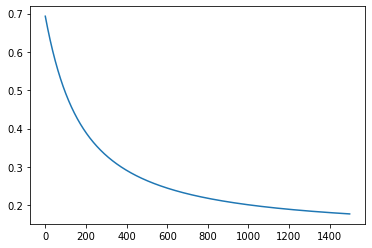

In [6]:
plt.plot(loss_dict.keys(), loss_dict.values())
plt.show()
plt.close()

In [8]:
y_pred = model(x, final_beta)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       254
           1       0.91      0.99      0.95       246

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

